In [21]:
from keras_preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import os

In [22]:
Train_Data_Dir = "C:/Users/jugal/Desktop/WTF/Dataset 3/Train"

Train_Data_Gen = IDG(rescale=1./255,
                     zoom_range=0.15,
                     horizontal_flip=True,
                     fill_mode='nearest'
                     )

In [23]:
Validation_Data_Dir = "C:/Users/jugal/Desktop/WTF/Dataset 3/Test"
Validation_Data_Gen = IDG(rescale = 1./255)

train_generator = Train_Data_Gen.flow_from_directory(Train_Data_Dir,
                                                       target_size=(224,224),
                                                       shuffle = True,
                                                       class_mode='categorical',
                                                       batch_size = 128
                                                       )

Found 1800 images belonging to 2 classes.


In [24]:
validation_generator = Validation_Data_Gen.flow_from_directory(Validation_Data_Dir,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              shuffle = True,
                                                              batch_size= 14
                                                              )

Found 200 images belonging to 2 classes.


In [25]:
base_model = InceptionV3(input_tensor=Input(shape=(224, 224, 3)), weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

In [26]:
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True

callbacks = myCallback()

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 128s 9s/step - loss: 8.0393 - acc: 0.7703 - val_loss: 0.1608 - val_acc: 0.9337
Epoch 2/20
14/14 [==============================] - 112s 8s/step - loss: 0.2283 - acc: 0.9282 - val_loss: 1.3759 - val_acc: 0.5255
Epoch 3/20
14/14 [==============================] - 115s 8s/step - loss: 0.4342 - acc: 0.8882 - val_loss: 0.1253 - val_acc: 0.9439
Epoch 4/20
14/14 [==============================] - 98s 7s/step - loss: 0.0914 - acc: 0.9677 - val_loss: 0.4846 - val_acc: 0.8776
Epoch 5/20
14/14 [==============================] - 108s 8s/step - loss: 0.2404 - acc: 0.9240 - val_loss: 0.6521 - val_acc: 0.7755
Epoch 6/20
14/14 [==============================] - ETA: 0s - loss: 0.1033 - acc: 0.9647

 Reached The Destination!
14/14 [==============================] - 89s 6s/step - loss: 0.1033 - acc: 0.9647 - val_loss: 0.1015 - val_acc: 0.9694


In [30]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

In [32]:
history = model.fit(train_generator,
                    steps_per_epoch = 14,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 14,
                    callbacks=[callbacks]
                    )

Epoch 1/20
14/14 [==============================] - 117s 8s/step - loss: 0.4337 - acc: 0.7781 - val_loss: 0.1022 - val_acc: 0.9694
Epoch 2/20
14/14 [==============================] - 128s 9s/step - loss: 0.3336 - acc: 0.8254 - val_loss: 0.1012 - val_acc: 0.9643
Epoch 3/20
14/14 [==============================] - 115s 8s/step - loss: 0.2624 - acc: 0.8636 - val_loss: 0.1043 - val_acc: 0.9643
Epoch 4/20
14/14 [==============================] - 114s 8s/step - loss: 0.2041 - acc: 0.9091 - val_loss: 0.1086 - val_acc: 0.9592
Epoch 5/20
14/14 [==============================] - 119s 8s/step - loss: 0.1848 - acc: 0.9205 - val_loss: 0.1132 - val_acc: 0.9592
Epoch 6/20
14/14 [==============================] - 122s 9s/step - loss: 0.1511 - acc: 0.9459 - val_loss: 0.1080 - val_acc: 0.9592
Epoch 7/20
14/14 [==============================] - 114s 8s/step - loss: 0.1394 - acc: 0.9486 - val_loss: 0.1180 - val_acc: 0.9592
Epoch 8/20
14/14 [==============================] - 117s 8s/step - loss: 0.1259 - a

In [33]:
print(len(base_model.layers))

311


In [34]:
get_ipython().run_line_magic('matplotlib', 'inline')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

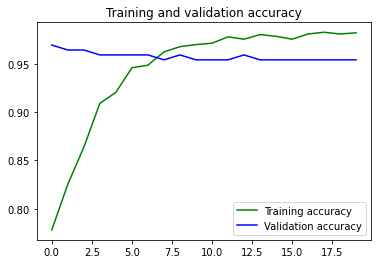

<Figure size 432x288 with 0 Axes>

In [35]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

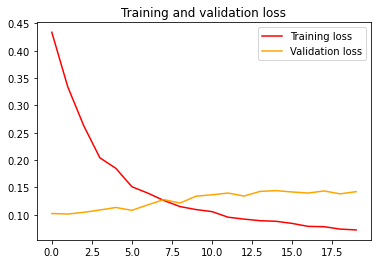

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [38]:
path = 'C:/Users/jugal/Desktop/WTF/Dataset 3/Test/Fire/image_53.jpg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
print(np.argmax(classes[0])==0, max(classes[0]))

True 0.9488986


In [39]:
model_json = model.to_json()
with open("InceptionV3.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("InceptionV3.h5")
print("Saved model to disk")

os.path.dirname(os.path.realpath("__file__"))

Saved model to disk


'C:\\Users\\jugal'